### Подключение библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from scipy import stats
from datetime import datetime

In [2]:
# функция округления
def round_everyone(a):
    return round(a, 3)
def cmp(a):
    return a[1]

### Чтение csv-файлов

In [3]:
data = pd.read_csv("train.csv", sep=",")
macro = pd.read_csv("macro.csv", sep=",")

In [96]:
data1=pd.read_csv("train.csv", sep=",")
data1['rpsq']=0



Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [4]:
data.info

<bound method DataFrame.info of           id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0          1  2011-08-20       43     27.0    4.0        NaN       NaN   
1          2  2011-08-23       34     19.0    3.0        NaN       NaN   
2          3  2011-08-27       43     29.0    2.0        NaN       NaN   
3          4  2011-09-01       89     50.0    9.0        NaN       NaN   
4          5  2011-09-05       77     77.0    4.0        NaN       NaN   
...      ...         ...      ...      ...    ...        ...       ...   
30466  30469  2015-06-30       44     27.0    7.0        9.0       1.0   
30467  30470  2015-06-30       86     59.0    3.0        9.0       2.0   
30468  30471  2015-06-30       45      NaN   10.0       20.0       1.0   
30469  30472  2015-06-30       64     32.0    5.0       15.0       1.0   
30470  30473  2015-06-30       43     28.0    1.0        9.0       1.0   

       build_year  num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0    

<Axes: >

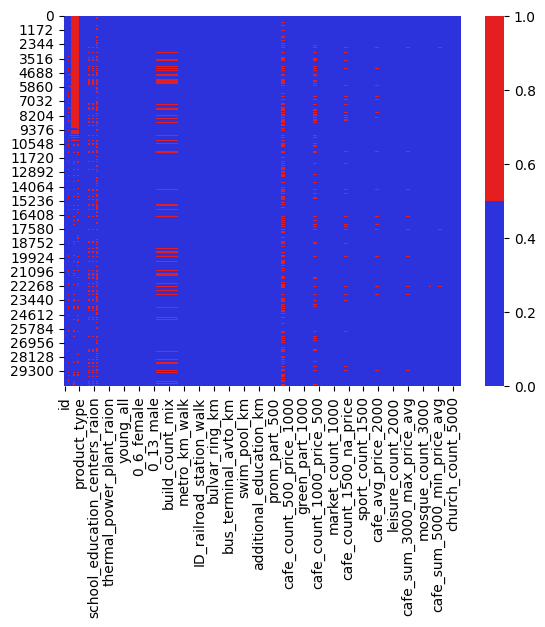

In [5]:
# тепловая карта пропущенных значений
col = data.columns
colours = ["#2C32DC", "#E51F1F"]
sns.heatmap(data[col].isnull(), cmap=sns.color_palette(colours))

# Добавление макропараметров

In [6]:
# macro.info

<Axes: >

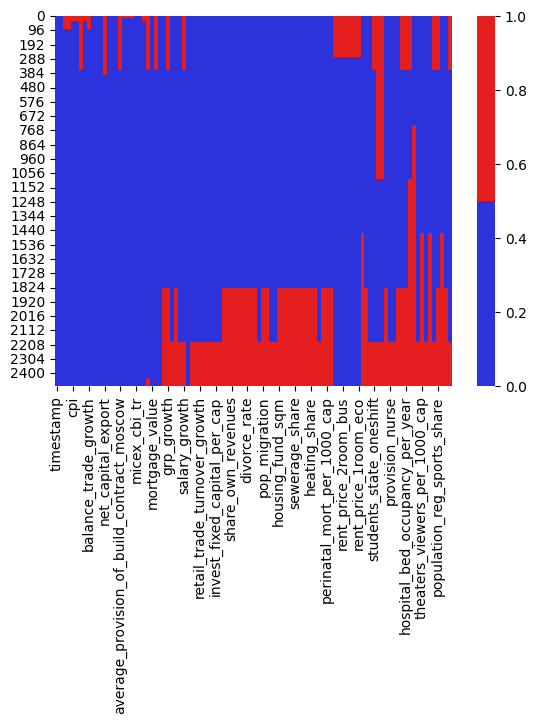

In [7]:
col_m = macro.columns
colours = ["#2C32DC", "#E51F1F"]
sns.heatmap(macro[col_m].isnull(), cmap=sns.color_palette(colours))

In [8]:
starting_point = datetime.strptime("2000-01-01", "%Y-%m-%d")


def time_to_int(s):
    global starting_point
    # Принимает дату в виде строки YYYY-MM-DD
    # Возвращает дату в количестве дней int64
    return (datetime.strptime(s, "%Y-%m-%d") - starting_point).days


def time_to_int_Series(Ser):
    for i in range(len(Ser)):
        Ser[i] = time_to_int(Ser[i])
    return Ser

In [9]:
macro["timestamp"] = macro["timestamp"].apply(time_to_int).astype("int")
time_min = macro["timestamp"].min()
macro["timestamp"] = macro["timestamp"] - time_min

data["timestamp"] = data["timestamp"].apply(time_to_int).astype("int")
data["timestamp"] = data["timestamp"] - time_min

In [10]:
data = pd.merge(macro, data, on="timestamp")

In [11]:
data

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,596,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,29.0048,...,9,4,0,13,22,1,0,52,4,5850000
1,599,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.9525,...,15,3,0,15,29,1,10,66,14,6000000
2,603,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.8082,...,10,3,0,11,27,0,4,67,10,5700000
3,608,111.2900,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,28.9655,...,11,2,1,4,4,0,0,26,3,13100000
4,612,111.2900,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,29.4625,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2006,61.4105,18209.7,-2.8,489.5,568.9,123.661,16.416,32.9,55.2655,...,15,5,0,15,26,1,2,84,6,7400000
30467,2006,61.4105,18209.7,-2.8,489.5,568.9,123.661,16.416,32.9,55.2655,...,313,128,24,98,182,1,82,171,15,25000000
30468,2006,61.4105,18209.7,-2.8,489.5,568.9,123.661,16.416,32.9,55.2655,...,1,1,0,2,12,0,1,11,1,6970959
30469,2006,61.4105,18209.7,-2.8,489.5,568.9,123.661,16.416,32.9,55.2655,...,22,1,1,6,31,1,4,65,7,13500000


# Преобразование факторов

In [12]:
missing_values = []
for col in data.columns:
    missing_values.append(
        [col, round_everyone((len(data) - sum(data[col].isna())) / len(data))]
    )
missing_values.sort(reverse=True, key=cmp)
for i in missing_values:
    print(f"{i[0]} - {i[1]}")

timestamp - 1.0
oil_urals - 1.0
gdp_quart - 1.0
gdp_quart_growth - 1.0
cpi - 1.0
ppi - 1.0
gdp_deflator - 1.0
balance_trade - 1.0
balance_trade_growth - 1.0
usdrub - 1.0
eurrub - 1.0
brent - 1.0
net_capital_export - 1.0
gdp_annual - 1.0
gdp_annual_growth - 1.0
average_provision_of_build_contract - 1.0
average_provision_of_build_contract_moscow - 1.0
rts - 1.0
micex - 1.0
micex_rgbi_tr - 1.0
micex_cbi_tr - 1.0
deposits_value - 1.0
deposits_growth - 1.0
deposits_rate - 1.0
mortgage_value - 1.0
mortgage_growth - 1.0
mortgage_rate - 1.0
income_per_cap - 1.0
salary - 1.0
salary_growth - 1.0
fixed_basket - 1.0
retail_trade_turnover - 1.0
retail_trade_turnover_per_cap - 1.0
retail_trade_turnover_growth - 1.0
labor_force - 1.0
unemployment - 1.0
employment - 1.0
invest_fixed_capital_per_cap - 1.0
invest_fixed_assets - 1.0
pop_natural_increase - 1.0
childbirth - 1.0
mortality - 1.0
average_life_exp - 1.0
rent_price_4+room_bus - 1.0
rent_price_3room_bus - 1.0
rent_price_2room_bus - 1.0
rent_pric

In [13]:
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        data[f"{col}_missing_c"] = missing
missing_col = [col for col in data.columns if ("missing_c" in col)]
data["num_missing"] = data[missing_col].sum(axis=1)

In [14]:
missing_values = []
for col in data.columns:
    if sum(data[col].isna()) > 0:
        missing_values.append(
            [col, round_everyone((len(data) - sum(data[col].isna())) / len(data))]
        )
missing_values.sort(reverse=True, key=cmp)
for i in missing_values:
    print(f"{i[0]} - {i[1]}")

metro_min_walk - 0.999
metro_km_walk - 0.999
railroad_station_walk_km - 0.999
railroad_station_walk_min - 0.999
ID_railroad_station_walk - 0.999
floor - 0.995
prom_part_5000 - 0.994
cafe_sum_5000_min_price_avg - 0.99
cafe_sum_5000_max_price_avg - 0.99
cafe_avg_price_5000 - 0.99
cafe_sum_3000_min_price_avg - 0.967
cafe_sum_3000_max_price_avg - 0.967
cafe_avg_price_3000 - 0.967
cafe_sum_2000_min_price_avg - 0.943
cafe_sum_2000_max_price_avg - 0.943
cafe_avg_price_2000 - 0.943
grp - 0.894
grp_growth - 0.894
real_dispos_income_per_cap_growth - 0.894
profitable_enterpr_share - 0.894
unprofitable_enterpr_share - 0.894
share_own_revenues - 0.894
overdue_wages_per_cap - 0.894
fin_res_per_cap - 0.894
marriages_per_1000_cap - 0.894
divorce_rate - 0.894
construction_value - 0.894
invest_fixed_assets_phys - 0.894
pop_migration - 0.894
pop_total_inc - 0.894
housing_fund_sqm - 0.894
lodging_sqm_per_cap - 0.894
water_pipes_share - 0.894
baths_share - 0.894
sewerage_share - 0.894
gas_share - 0.894
hot

In [15]:
data.drop((data[data["num_missing"] > 30].index), axis=0, inplace=True)

In [16]:
data.drop(
    [
        "hospital_beds_raion",
        "load_of_teachers_preschool_per_teacher",
        "theaters_viewers_per_1000_cap",
        "museum_visitis_per_100_cap",
        "students_reg_sports_share",
        "provision_retail_space_sqm",
        "provision_retail_space_modern_sqm",
    ],
    axis=1,
    inplace=True,
)

In [17]:
# Выделение числовых характеристик
data_num = data.select_dtypes(include=[np.number])
col_num = list(data_num.columns)

In [18]:
# Остальные признаки
data_nonum = data.select_dtypes(exclude=[np.number])
col_nomun = list(data_nonum.columns)

In [19]:
col_exceptions = ["ID_railroad_station_walk", "material"]
for col in col_num:
    if (col not in col_exceptions) and (len(data[data[col].isna()]) > 0):
        print(col)
        data[f"{col}_missing_c"] = len(data[data[col].isna()])
        median = data[col].median()
        data[col] = data[col].fillna(median)

life_sq
floor
max_floor
build_year
num_room
kitch_sq
state
preschool_quota
school_quota
raion_build_count_with_material_info
build_count_block
build_count_wood
build_count_frame
build_count_brick
build_count_monolith
build_count_panel
build_count_foam
build_count_slag
build_count_mix
raion_build_count_with_builddate_info
build_count_before_1920
build_count_1921-1945
build_count_1946-1970
build_count_1971-1995
build_count_after_1995
metro_min_walk
metro_km_walk
railroad_station_walk_km
railroad_station_walk_min
cafe_sum_500_min_price_avg
cafe_sum_500_max_price_avg
cafe_avg_price_500
cafe_sum_1000_min_price_avg
cafe_sum_1000_max_price_avg
cafe_avg_price_1000
cafe_sum_1500_min_price_avg
cafe_sum_1500_max_price_avg
cafe_avg_price_1500
cafe_sum_2000_min_price_avg
cafe_sum_2000_max_price_avg
cafe_avg_price_2000
cafe_sum_3000_min_price_avg
cafe_sum_3000_max_price_avg
cafe_avg_price_3000
prom_part_5000
cafe_sum_5000_min_price_avg
cafe_sum_5000_max_price_avg
cafe_avg_price_5000


In [20]:
data["ID_railroad_station_walk"].value_counts()

ID_railroad_station_walk
24.0     1602
75.0     1547
47.0     1014
33.0     1000
4.0       999
         ... 
121.0       2
126.0       1
129.0       1
130.0       1
132.0       1
Name: count, Length: 122, dtype: int64

In [21]:
data["ID_railroad_station_walk"] = data["ID_railroad_station_walk"].fillna(24)

<Axes: >

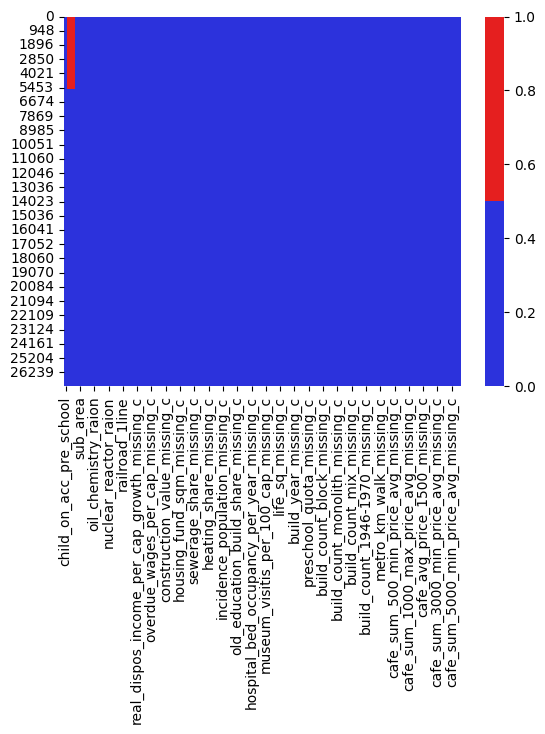

In [22]:
colours = ["#2C32DC", "#E51F1F"]
sns.heatmap(data[col_nomun].isna(), cmap=sns.color_palette(colours))

In [23]:
missing_values = []
for col in data.columns:
    if (len(data) - sum(data[col].isna())) / len(data) < 1:
        missing_values.append(
            [col, round_everyone((len(data) - sum(data[col].isna())) / len(data))]
        )
missing_values.sort(reverse=True, key=cmp)
for i in missing_values:
    print(f"{i[0]} - {i[1]}")

modern_education_share - 0.804
old_education_build_share - 0.804
material - 0.673


In [24]:
len(data[data["modern_education_share"].isna()])

4816

In [25]:
data.groupby("modern_education_share").aggregate({"price_doc": "count"}).rename(
    columns={"price_doc": "Count"}
).sort_values

<bound method DataFrame.sort_values of                         Count
modern_education_share       
90,92                    7083
93,08                   12724>

In [26]:
data["modern_education_share"] = data["modern_education_share"].fillna("no_data")

In [27]:
data.groupby("old_education_build_share").aggregate({"price_doc": "count"}).rename(
    columns={"price_doc": "Count"}
).sort_values

<bound method DataFrame.sort_values of                            Count
old_education_build_share       
23,14                       7083
25,47                      12724>

In [28]:
data["old_education_build_share"] = data["old_education_build_share"].fillna("no_data")

In [29]:
data["ID_railroad_station_walk"] = data["ID_railroad_station_walk"].fillna("no_data")

In [30]:
data.reset_index(inplace=True)
del data["index"]

/tmp/ipykernel_39899/3309890369.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.reset_index(inplace=True)


In [31]:
data

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,cafe_sum_2000_max_price_avg_missing_c,cafe_avg_price_2000_missing_c,cafe_sum_3000_min_price_avg_missing_c,cafe_sum_3000_max_price_avg_missing_c,cafe_avg_price_3000_missing_c,prom_part_5000_missing_c,cafe_sum_5000_min_price_avg_missing_c,cafe_sum_5000_max_price_avg_missing_c,cafe_avg_price_5000_missing_c,num_missing
0,596,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,29.0048,...,576,576,152,152,152,29,123,123,123,11
1,599,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.9525,...,576,576,152,152,152,29,123,123,123,8
2,603,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.8082,...,576,576,152,152,152,29,123,123,123,8
3,608,111.2900,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,28.9655,...,576,576,152,152,152,29,123,123,123,9
4,612,111.2900,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,29.4625,...,576,576,152,152,152,29,123,123,123,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24618,1825,61.2833,20406.9,0.9,440.5,510.1,113.465,15.317,7.2,58.2520,...,576,576,152,152,152,29,123,123,123,30
24619,1825,61.2833,20406.9,0.9,440.5,510.1,113.465,15.317,7.2,58.2520,...,576,576,152,152,152,29,123,123,123,10
24620,1825,61.2833,20406.9,0.9,440.5,510.1,113.465,15.317,7.2,58.2520,...,576,576,152,152,152,29,123,123,123,6
24621,1825,61.2833,20406.9,0.9,440.5,510.1,113.465,15.317,7.2,58.2520,...,576,576,152,152,152,29,123,123,123,7


In [32]:
# преобразование material. Так же используются данные о количестве домов каждого типа в районе.
material_val = [
    "block",
    "wood",
    "frame",
    "brick",
    "monolith",
    "panel",
    "foam",
    "slag",
    "mix",
]
for col in material_val:
    data[f"material_{col}"] = 0.0
for i in range(len(data)):
    if np.isnan(data.iloc[i]["material"]):
        summ = sum([data.iloc[i][f"build_count_{col}"] for col in material_val])
        for col in material_val:
            data.at[i, f"material_{col}"] = data.iloc[i][f"build_count_{col}"] / summ
    else:
        ind = material_val[int(data.iloc[i]["material"] - 1)]
        data.at[i, f"material_{ind}"] = 1

/tmp/ipykernel_39899/3706144554.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"material_{col}"] = 0.0
/tmp/ipykernel_39899/3706144554.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"material_{col}"] = 0.0
/tmp/ipykernel_39899/3706144554.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [33]:
data

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,num_missing,material_block,material_wood,material_frame,material_brick,material_monolith,material_panel,material_foam,material_slag,material_mix
0,596,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,29.0048,...,11,0.118483,0.000000,0.000000,0.000000,0.009479,0.872038,0.0,0.000000,0.000000
1,599,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.9525,...,8,0.338776,0.004082,0.000000,0.273469,0.016327,0.367347,0.0,0.000000,0.000000
2,603,109.3100,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.8082,...,8,0.178788,0.000000,0.000000,0.624242,0.012121,0.181818,0.0,0.003030,0.000000
3,608,111.2900,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,28.9655,...,9,0.019651,0.111354,0.026201,0.270742,0.109170,0.438865,0.0,0.019651,0.004367
4,612,111.2900,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,29.4625,...,8,0.064343,0.000000,0.000000,0.861930,0.021448,0.046917,0.0,0.004021,0.001340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24618,1825,61.2833,20406.9,0.9,440.5,510.1,113.465,15.317,7.2,58.2520,...,30,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
24619,1825,61.2833,20406.9,0.9,440.5,510.1,113.465,15.317,7.2,58.2520,...,10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
24620,1825,61.2833,20406.9,0.9,440.5,510.1,113.465,15.317,7.2,58.2520,...,6,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
24621,1825,61.2833,20406.9,0.9,440.5,510.1,113.465,15.317,7.2,58.2520,...,7,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000


In [34]:
data.drop("material", axis=1, inplace=True)
for col in material_val:
    data.drop(f"build_count_{col}", axis=1, inplace=True)

product_type

In [35]:
data[(data["sub_area"].isna()) & (~data["raion_build_count_with_material_info"].isna())]

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,num_missing,material_block,material_wood,material_frame,material_brick,material_monolith,material_panel,material_foam,material_slag,material_mix


In [36]:
# Investment - объект покупался как инвестиция (1)
# OwnerOccupier - для проживания в нем покупателя (1)
data["Investment"] = (data["product_type"] == "Investment").astype("int")
data["OwnerOccupier"] = (data["product_type"] == "OwnerOccupier").astype("int")

# data[['Investment','OwnerOccupier']]

/tmp/ipykernel_39899/1003781237.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["Investment"] = (data["product_type"] == "Investment").astype("int")
/tmp/ipykernel_39899/1003781237.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["OwnerOccupier"] = (data["product_type"] == "OwnerOccupier").astype("int")


In [37]:
columns_for_splitting = [
    "big_market_raion",
    "railroad_terminal_raion",
    "nuclear_reactor_raion",
    "detention_facility_raion",
    "water_1line",
    "big_road1_1line",
    "railroad_1line",
]
for i in columns_for_splitting:
    data[i + "_availability"] = (data[i] == "yes").astype("int")
    data[i + "_lack"] = (data[i] == "no").astype("int")
data[
    [
        "big_market_raion_availability",
        "railroad_terminal_raion_availability",
        "nuclear_reactor_raion_availability",
        "detention_facility_raion_availability",
        "water_1line_availability",
        "big_road1_1line_availability",
        "railroad_1line_availability",
    ]
]

/tmp/ipykernel_39899/3379816738.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i + "_availability"] = (data[i] == "yes").astype("int")
/tmp/ipykernel_39899/3379816738.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i + "_lack"] = (data[i] == "no").astype("int")
/tmp/ipykernel_39899/3379816738.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

,big_market_raion_availability,railroad_terminal_raion_availability,nuclear_reactor_raion_availability,detention_facility_raion_availability,water_1line_availability,big_road1_1line_availability,railroad_1line_availability
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
24618,1,0,0,0,0,0,0
24619,0,0,0,1,1,0,0
24620,0,0,0,0,0,0,0
24621,0,0,0,0,0,0,0


ecology

In [38]:
def ecology_to_int(s):
    if s == "no data":
        return np.nan
    if s == "poor":
        return 1
    if s == "satisfactory":
        return 2
    if s == "good":
        return 3
    if s == "excellent":
        return 4

In [39]:
# ecology_dg - уровень экологии (от 1 до 4, NaN - нет данных)
data["ecology_dg"] = data["ecology"].apply(ecology_to_int)

# data['ecology_dg']

/tmp/ipykernel_39899/3516635248.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["ecology_dg"] = data["ecology"].apply(ecology_to_int)


In [40]:
ID_columns = [
    "sub_area",
    "ID_railroad_station_walk",
    "ID_railroad_station_avto",
    "ID_big_road1",
    "ID_big_road2",
    "ID_railroad_terminal",
    "ID_bus_terminal",
]

for col in ID_columns:
    target_means = data.groupby(col)["price_doc"].mean()
    data[col + "_encoded"] = data[col].map(target_means)
    data[col + "_encoded"].apply(round_everyone)
# data[['sub_area','sub_area_encoded']]

/tmp/ipykernel_39899/2347558268.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col + "_encoded"] = data[col].map(target_means)
/tmp/ipykernel_39899/2347558268.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col + "_encoded"] = data[col].map(target_means)
/tmp/ipykernel_39899/2347558268.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

culture_objects_top_25
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion

In [41]:
def yes_no_c(a):
    data[a + "_avaliability"] = (data[a] == "yes").astype(int)
    data[a + "_lack"] = (data[a] != "yes").astype(int)
    data.drop(a, axis=1, inplace=True)


for (
    i
) in "culture_objects_top_25 thermal_power_plant_raion incineration_raion oil_chemistry_raion radiation_raion".split():
    yes_no_c(i)

/tmp/ipykernel_39899/3551165638.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[a + "_avaliability"] = (data[a] == "yes").astype(int)
/tmp/ipykernel_39899/3551165638.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[a + "_lack"] = (data[a] != "yes").astype(int)
/tmp/ipykernel_39899/3551165638.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

<Axes: xlabel='build_year', ylabel='price_doc'>

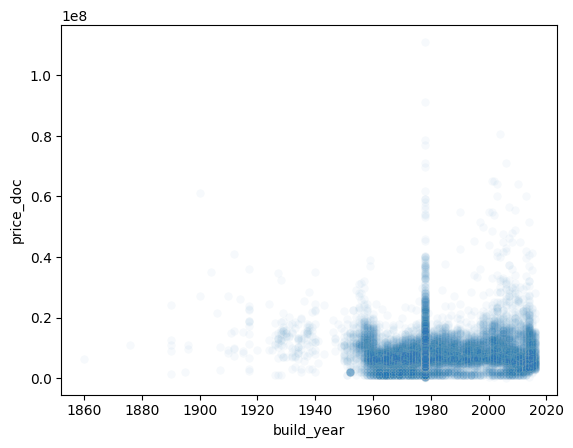

In [42]:
sns.scatterplot(
    x=data[(data["build_year"] > 1700) & (data["build_year"] < 2017)]["build_year"],
    y=data["price_doc"],
    alpha=0.04,
)

In [43]:
data.drop(['child_on_acc_pre_school', 
'modern_education_share', 
'old_education_build_share', 
'product_type', 
'sub_area', 
'railroad_terminal_raion', 
'big_market_raion', 
'nuclear_reactor_raion', 
'detention_facility_raion', 
'water_1line', 
'big_road1_1line', 
'railroad_1line', 
'ecology'],axis=1,inplace=True)

In [44]:
for col in data.columns:
    if (data[col].dtype not in ['int64','bool','float64']):
        print(f"'{col}', ")


# Обработка лишних значений

In [45]:
pd.set_option('display.max_rows', None)  # Отображение всех строк
pd.set_option('display.max_columns', None)  # Отображение всех столбцов

In [46]:
corr=data.corr()["price_doc"].sort_values(key=abs)[:411]

In [47]:

corr_useless = corr[(corr <= 0.1) & (corr >= -0.1)]
print(len(corr_useless))
corr_useless

264


school_quota                                       -0.000470
build_count_1971-1995                              -0.000716
cemetery_km                                        -0.001494
ID_railroad_station_walk_missing_c                 -0.001885
build_year                                          0.002404
male_f                                             -0.003236
average_provision_of_build_contract_moscow         -0.004018
full_all                                           -0.004249
female_f                                           -0.005101
16_29_male                                         -0.006560
ID_railroad_station_walk                           -0.006734
trc_sqm_500                                        -0.006995
ecology_dg                                         -0.007161
16_29_all                                          -0.007243
balance_trade                                       0.007522
lodging_sqm_per_cap                                 0.007875
16_29_female            

In [48]:
corr=corr[(corr<-0.1) | (corr>0.1)]
corr

cafe_count_1000_na_price               0.100547
preschool_education_centers_raion      0.100616
mosque_count_2000                      0.100657
leisure_count_3000                     0.100777
prom_part_1500                        -0.101599
ice_rink_km                           -0.101922
cafe_count_1500                        0.102857
leisure_count_1500                     0.104061
kindergarten_km                       -0.104097
build_count_before_1920                0.105596
industrial_km                          0.105598
market_shop_km                        -0.106392
area_m                                -0.106532
cafe_count_2000_price_500              0.106554
cafe_count_2000_na_price               0.106800
cafe_count_500                         0.106810
trc_sqm_2000                           0.107810
cafe_count_1000_price_1500             0.107829
market_count_3000                      0.108038
cafe_count_2000_price_2500             0.108268
cafe_count_1500_price_2500             0

In [67]:

for i in corr_useless:
    print(i)
    #data.drop(i, axis=1, inplace=True)


-0.00046971202628185376
-0.0007156050009502425
-0.0014935654878478605
-0.001884842471232889
0.002404199784980567
-0.0032356137792755283
-0.004017971872909086
-0.0042488819765740945
-0.005101313189277083
-0.006559964572329405
-0.006733721399802012
-0.006995015338991979
-0.007160779680352944
-0.00724286765056687
0.007522122518978043
0.007874739017680281
-0.00788031171358322
0.008085807876689137
-0.00862764360151986
-0.00889325261783203
-0.00939932483244818
-0.009754458719565883
0.01237294368534027
0.012522107736070954
-0.012522107736071738
-0.01360339621529176
-0.014039936297655636
-0.014971409500233072
-0.01686350136953392
0.016863501369534566
-0.01695851737041006
0.017923484479406
-0.018494677405416302
0.018717786830521402
-0.018717786830522526
0.019496882233976675
-0.019647469209790217
-0.01991783977757856
0.020368702352491358
0.02129084222246325
-0.02163736421235603
0.022837821385173387
0.023759225370582795
-0.02399573843790468
0.0242424461023266
0.02617656897744848
-0.02625608429944

# Обработка выбросов

<Axes: ylabel='life_sq'>

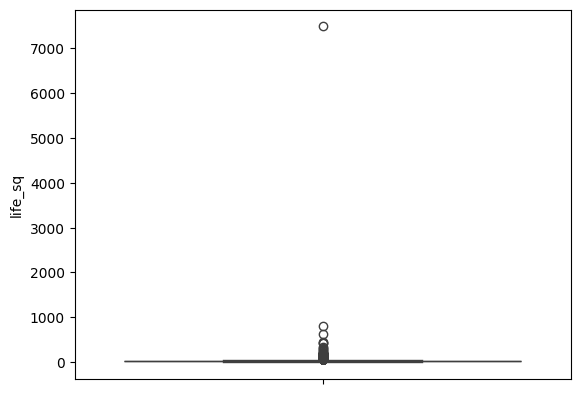

In [49]:
# sns.histplot(data['life_sq'],bins=200)
sns.boxplot(data["life_sq"])

<Axes: xlabel='build_year', ylabel='price_doc'>

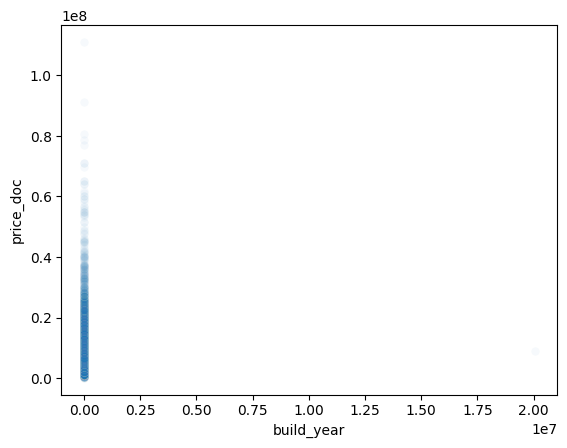

In [50]:
sns.scatterplot(
    x=data["build_year"],
    y=data["price_doc"],
    alpha=0.04,
)

<Axes: xlabel='build_year', ylabel='price_doc'>

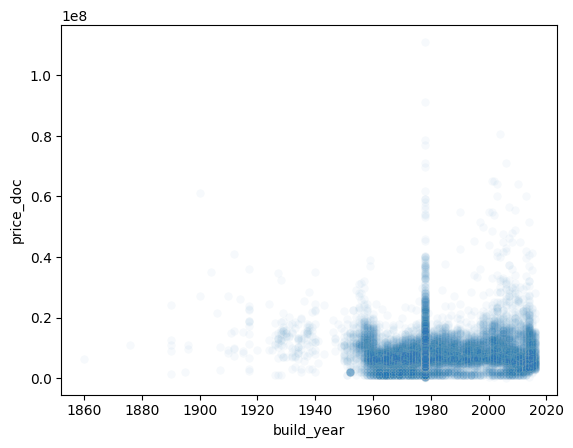

In [51]:
sns.scatterplot(
    x=data[(data["build_year"] > 1700) & (data["build_year"] < 2017)]["build_year"],
    y=data["price_doc"],
    alpha=0.04,
)

In [52]:
def hampel(vals_orig):
    vals = vals_orig.copy()
    difference = np.abs(vals.median() - vals)
    median_abs_deviation = difference.median()
    threshold = 7 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return vals

In [53]:
data_num = data.select_dtypes(include=[np.number])
col_num = data_num.columns.values
data_num.drop(
    [
        "timestamp",
        "oil_urals",
        "gdp_quart",
        "gdp_quart_growth",
        "cpi",
        "ppi",
        "gdp_deflator",
        "balance_trade",
        "balance_trade_growth",
        "usdrub",
        "eurrub",
        "brent",
        "net_capital_export",
        "gdp_annual",
        "gdp_annual_growth",
        "average_provision_of_build_contract",
        "average_provision_of_build_contract_moscow",
        "rts",
        "micex",
        "micex_rgbi_tr",
        "micex_cbi_tr",
        "deposits_value",
        "deposits_growth",
        "deposits_rate",
        "mortgage_value",
        "mortgage_growth",
        "mortgage_rate",
        "grp",
        "grp_growth",
        "income_per_cap",
        "real_dispos_income_per_cap_growth",
        "salary",
        "salary_growth",
        "fixed_basket",
        "retail_trade_turnover",
        "retail_trade_turnover_per_cap",
        "retail_trade_turnover_growth",
        "labor_force",
        "unemployment",
        "employment",
        "invest_fixed_capital_per_cap",
        "invest_fixed_assets",
        "profitable_enterpr_share",
        "unprofitable_enterpr_share",
        "share_own_revenues",
        "overdue_wages_per_cap",
        "fin_res_per_cap",
        "ID_metro",
        "ID_railroad_station_walk",
        "ID_railroad_station_avto",
        "ID_big_road1",
        "ID_big_road2",
        "ID_railroad_terminal",
        "ID_bus_terminal",
    ],
    axis=1,
    inplace=True,
)

In [ ]:
# Удаляем выбросы на основе Z-оценки

data_num['del']=0

# Sort the DataFrame based on each column and apply the operation
for column in data_num.columns:
    # Skip 'del' column if it exists
    if column == 'del':
        continue
    if column == 'price_doc':
        percentile_2_5 = int(len(data_num) * 0.025) 
    else:
        percentile_2_5 = int(len(data_num) * 0.0001) 
    # Sort the DataFrame based on the current column
    data_num_sorted = data_num.sort_values(by=column)
    # Select 2.5% from both sides and change 'del' to 1
    data_num_sorted.iloc[:percentile_2_5, data_num_sorted.columns.get_loc('del')] = 1
    data_num_sorted.iloc[-percentile_2_5:, data_num_sorted.columns.get_loc('del')] = 1
    data_num=data_num_sorted
data_num = data_num[data_num['del'] != 1]

In [ ]:
sns.scatterplot(x=data["build_year"], y=data["price_doc"])

In [ ]:
data.drop("load_of_teachers_school_per_teacher", axis=1, inplace=True)

In [ ]:

for i in corr:
    print(i)

In [76]:
pd.DataFrame(corr)

,price_doc
cafe_count_1000_na_price,0.100547
preschool_education_centers_raion,0.100616
mosque_count_2000,0.100657
leisure_count_3000,0.100777
prom_part_1500,-0.101599
ice_rink_km,-0.101922
cafe_count_1500,0.102857
leisure_count_1500,0.104061
kindergarten_km,-0.104097
build_count_before_1920,0.105596


In [80]:
data=data[data['num_room']<7]
data=data[(data['ID_big_road1_encoded']<1.4*1e7) & (data['ID_big_road1_encoded']>0.41*1e7)]
data=data[(data['full_sq']<300)]

In [ ]:
sns.histplot(x=data['days'],y=data['full_sq'].me, bins=15,  color='skyblue', edgecolor='black')

<Axes: xlabel='num_room', ylabel='Count'>

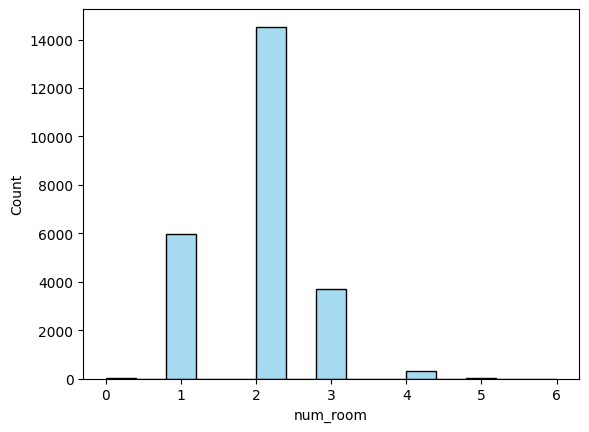

In [92]:
sns.histplot(data['num_room'], bins=15,  color='skyblue', edgecolor='black')

In [ ]:
print(f"Всего квартир: {len(data)}")
sns.histplot(data["price_doc"])

In [ ]:
print(
    f"Квартир стоимостью до 20 000 000 млн.р: {len(data[data['price_doc']<20000000])}"
)
sns.histplot(data[data["price_doc"] < 20000000]["price_doc"])

In [ ]:
# sns.scatterplot(x=data['full_sq'],y=data['price_doc'])
sns.scatterplot(x=data[data["full_sq"] < 1000]["full_sq"], y=data["price_doc"])
print(data["price_doc"].corr(data["full_sq"]))